In [1]:
library('ggplot2')
library('reshape2')

In [2]:
g1 <- data.frame(group=1,x = rnorm(100,1,1))
g2 <- data.frame(group=2,x = rnorm(100,5,1))
g3 <- data.frame(group=3,x = rnorm(100,20,1))
d = rbind(g1,g2,g3)
d$group <- as.factor(d$group)

In [3]:
head(d[sample(nrow(d)),])

,group,x
,<fct>,<dbl>
64,1,1.432084
288,3,19.514912
151,2,4.069881
280,3,18.266297
294,3,20.230185
101,2,5.687273


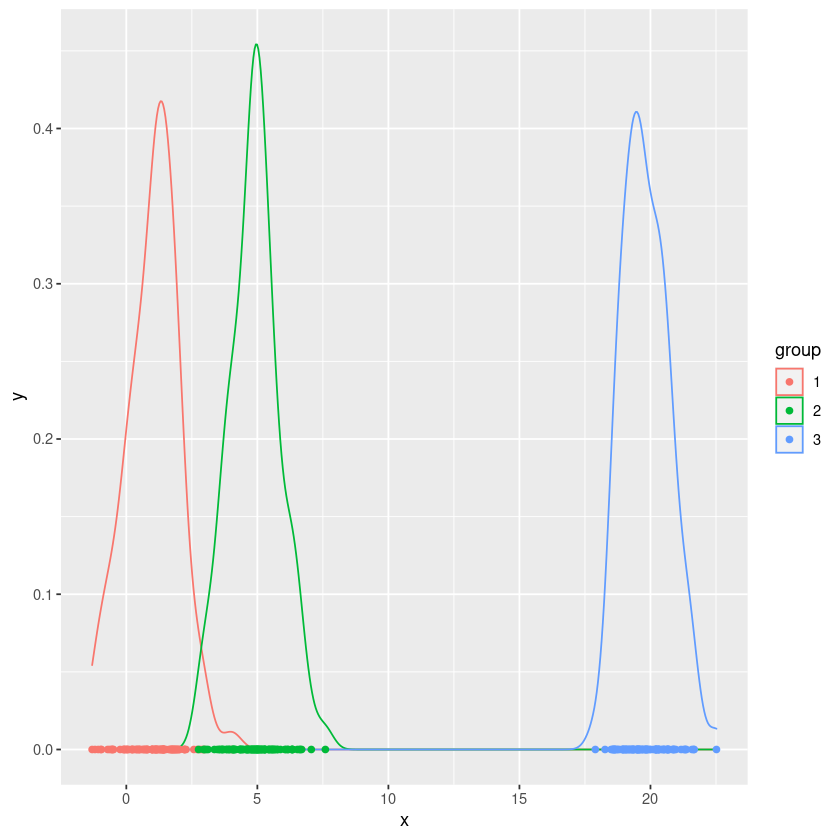

In [4]:
ggplot(data=d,mapping=aes(x=x,color=group,group=group))+geom_density()+geom_point(mapping=aes(x=x,y=0))

In [24]:
delta_lm=function(x0,class){
  d1 = d
  d1$ngroup=as.numeric(d1$group)
  d1$ngroup[d1$ngroup!=class] <- 0
  d1$ngroup[d1$ngroup==class] <- 1
  mod1 = lm(ngroup~x,data=d1)
  return(coef(mod1)[1] + coef(mod1)[2]*x0)
}


In [25]:
ests = function(predfn){
  xs = seq(min(d$x),max(d$x),.01)
  pred_df <- data.frame(
    '1'=predfn(xs,1),
    '2'=predfn(xs,2),
    '3'=predfn(xs,3)
  )
  mpred_df = melt(cbind(pred_df,xs),id.vars='xs')
  colnames(mpred_df)<-c('x','group','value')
  levels(mpred_df$group) <- 1:3
  preds = data.frame('x'=xs,apply(pred_df,1,which.max))
  colnames(preds) <- c('x','group')
  preds$group <- as.factor(preds$group)
  return(list(pfn=mpred_df,preds=preds))
}

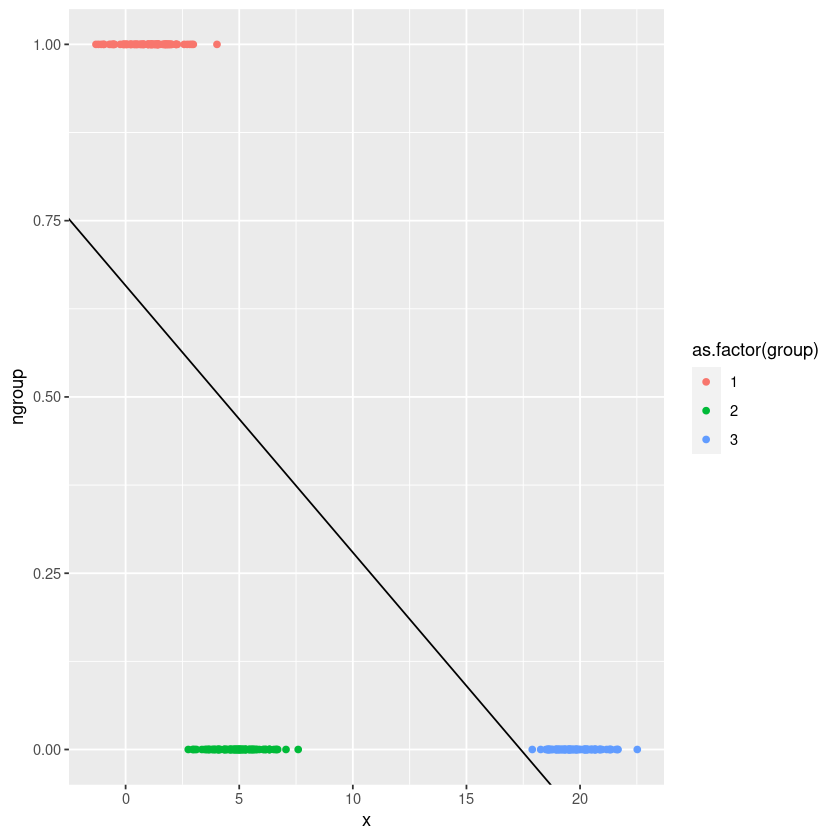

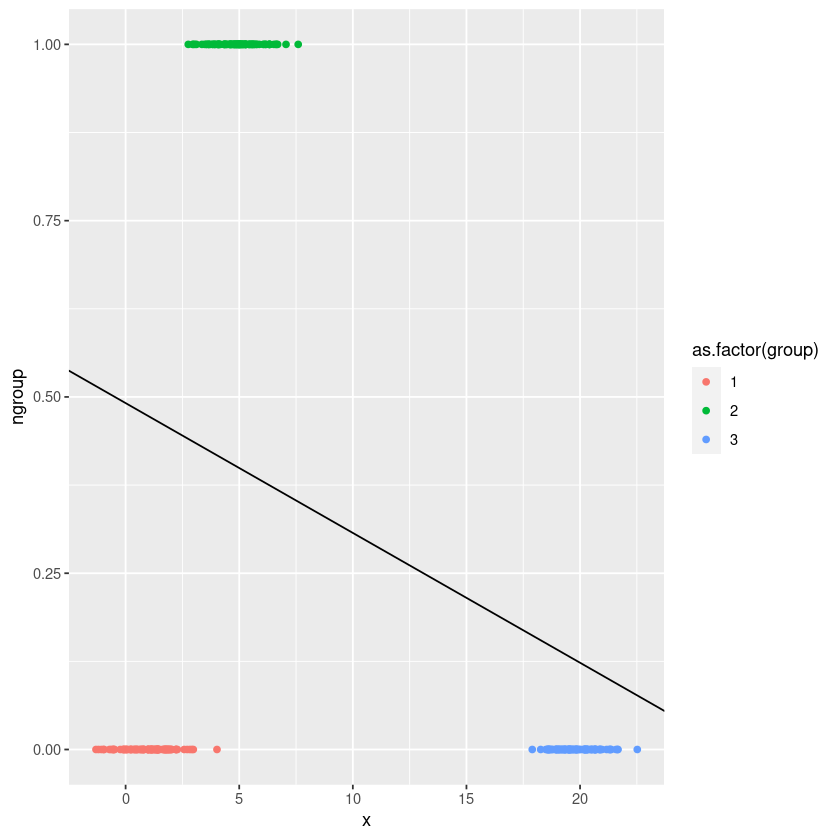

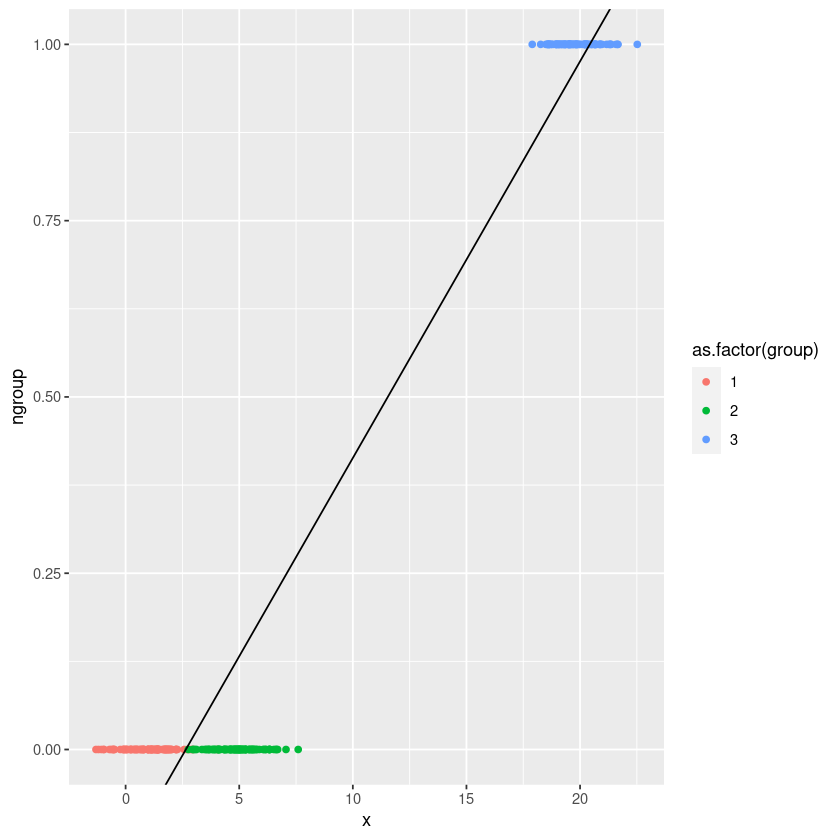

In [29]:
plot_lm=function(class){
  d1 = d
  d1$ngroup=as.numeric(d1$group)
  d1$ngroup[d1$ngroup!=class] <- 0
  d1$ngroup[d1$ngroup==class] <- 1
  mod1 = lm(ngroup~x,data=d1)
  print(ggplot(data=d1,mapping=aes(x=x,y=ngroup,color=as.factor(group)))+geom_point()+
    geom_abline(intercept=coef(mod1)[1],slope=coef(mod1)[2]))
}

plot_lm(1)
plot_lm(2)
plot_lm(3)


Warning message:
“Removed 1119 row(s) containing missing values (geom_path).”


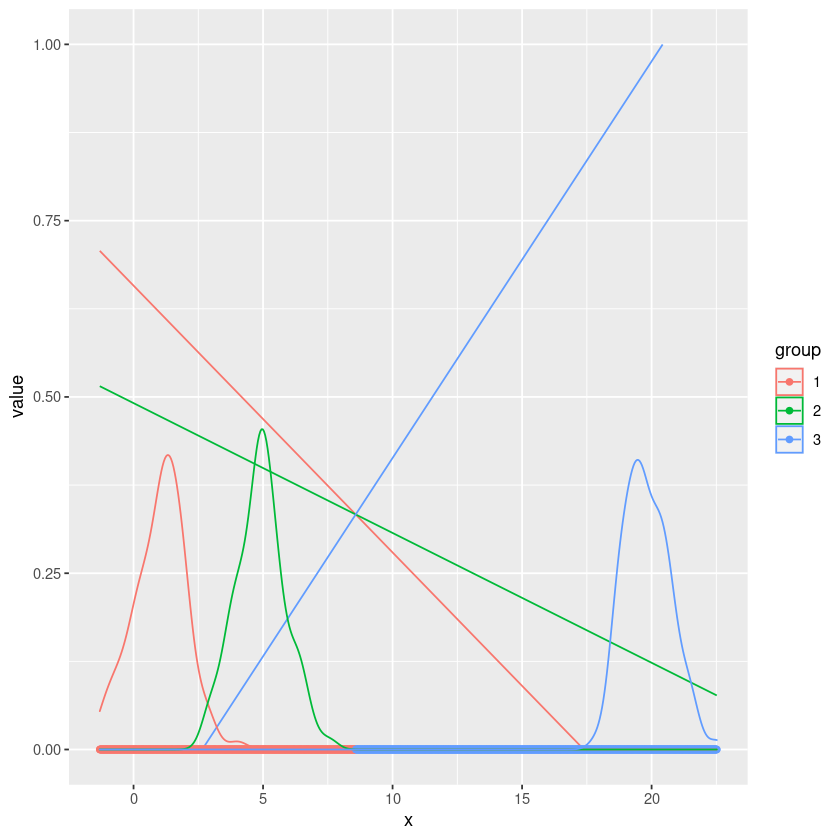

In [27]:
ests_lm = ests(delta_lm)
ggplot(data=ests_lm$pfn,mapping=aes(x=x,y=value,color=group))+
    geom_line()+geom_point(data=ests_lm$preds,mapping=aes(x=x,y=0))+
    ylim(0,1)+
    geom_density(data=d,mapping=aes(x=x,color=group,group=group),inherit.aes=FALSE)